In [1]:
# Importing the libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
# df = pd.read_csv('D:\\Paradise King\\Downloads\\a\\20191226-reviews.csv')
df = pd.read_csv('D:\\20191226-reviews.csv')

# Display the first few rows of the dataframe
print(df.head())

# Split data into features (X) and target (y)
X = df['body']
y = df['sentiment']
# df

         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes sentiment  
0  I had the Samsung A600 for awhile which is abs...           1.0  positive  
1  Due to a software issue between Nokia and Spri...          17.0  positive  
2  This is a great, reliable phone. I als

In [3]:
df.describe()

,rating,helpfulVotes
count,67960.000000,27207.000000
mean,3.807946,8.226045
std,1.582859,31.952782
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,5.000000
max,5.000000,990.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67960 entries, 0 to 67959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67960 non-null  object 
 1   name          67957 non-null  object 
 2   rating        67960 non-null  int64  
 3   date          67960 non-null  object 
 4   verified      67960 non-null  bool   
 5   title         67937 non-null  object 
 6   body          67960 non-null  object 
 7   helpfulVotes  27207 non-null  float64
 8   sentiment     67960 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 4.2+ MB


In [5]:
df.count()

asin            67960
name            67957
rating          67960
date            67960
verified        67960
title           67937
body            67960
helpfulVotes    27207
sentiment       67960
dtype: int64

In [6]:
df.head(5)

,asin,name,rating,date,verified,title,body,helpfulVotes,sentiment
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,positive
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,positive
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,positive
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,positive
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,positive


In [7]:
df.tail(5)

,asin,name,rating,date,verified,title,body,helpfulVotes,sentiment
67955,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0,positive
67956,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0,positive
67957,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN,positive
67958,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN,positive
67959,B0825BB7SG,Owen Gonzalez,5,"December 11, 2019",False,Outstanding phone for the price,I love the size and style of this phone. It is...,NaN,positive


In [8]:
df.shape

(67960, 9)

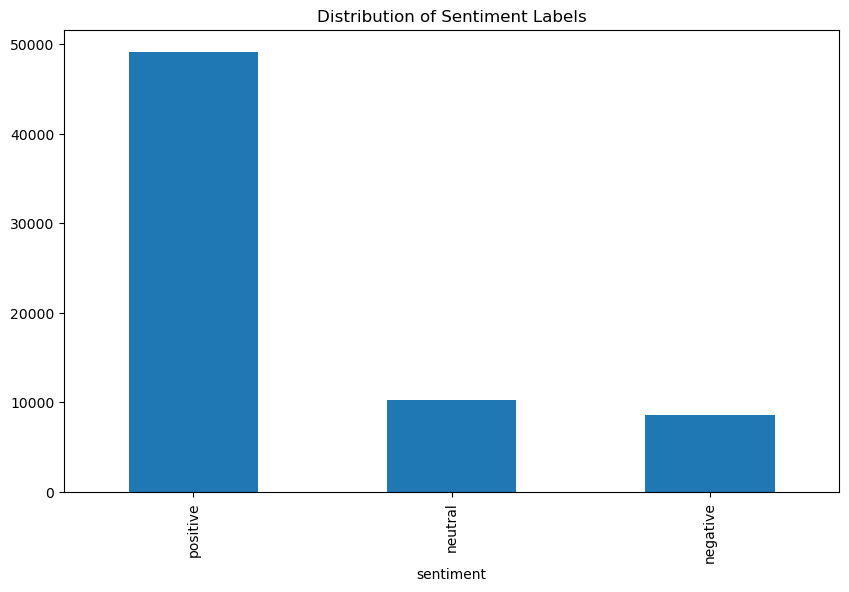

In [9]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [10]:
df['body'] = df['body'].astype(str)
import pandas as pd

# Check for NaN values in reviews
print(df['body'].isna().sum())

# Handling the NaN values
df = df.dropna(subset=['body'])

# Saving the changes
# df.to_csv('D:\\Paradise King\\Downloads\\a\\20191226-reviews.csv', index=False)
df.to_csv('D:\\20191226-reviews.csv', index=False)

0


In [11]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_transformed = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


In [12]:
# Initialize the RandomForest classifier
model = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")


Accuracy: 0.7213066509711595


In [13]:
# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42,max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")


Accuracy: 0.7452422993917991


In [14]:
# Initialize the LogisticRegression classifier
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a detailed classification report
# print(classification_report(y_test, y_pred))

Accuracy: 0.9403080243280361


In [15]:
def predict_sentiment(review, model, vectorizer):
    # Transform the review text into the same format used for training
    review_transformed = vectorizer.transform([review])
    
    # Use the model to predict sentiment
    prediction = model.predict(review_transformed)
    
    return prediction



# new_review = "I am happy with my purchase"
new_review = "I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a garage sale for $1. I wonder y she sold it so cheap?... Bad: ===> I hate the menu. It takes forever to get to what you want because you have to scroll endlessly. Usually phones have numbered categories so u can simply press the # and get where you want to go. ===> It's a pain to put it on silent or vibrate. If you're in class and it rings, you have to turn it off immediately. There's no fast way to silence the damn thing. Always remember to put it on silent! I learned that the hard way. ===> It's so true about the case. It's a mission to get off and will break ur nails in the process. Also, you'll damage the case each time u try. For some reason the phone started giving me problems once I did succeed in opening it. ===> Buttons could be a bit bigger. Vibration could be stronger. Good: ===> Reception is not too shabby. I was using it in the elevator which is a remarkable feat considering my old phone would lose service by simply putting it in my pocket. ===> Compared to my old Samsung, this phone works quite well. The ring tones are loud enough to hear and the phone actually charges quickly and has great battery life. It doesn't heat up like a potatoe in the oven either during long phone convos. ===> Nice bright, large screen. ===> Cute ways to customize it. Scroll bar can be set to purple, pink, aqua, orange, etc. Overall: Okay phone. It serves its purpose but definitely pales in comparison to these new phones coming out from Sprint. Why get so so when you can get great?"
sentiment = predict_sentiment(new_review, model, vectorizer)
print(f"The sentiment of the review is: {sentiment}")

The sentiment of the review is: ['positive']


In [17]:
a = pd.DataFrame({"Algorithm":["Logistic_Regressor","Decision_Tree","Random_Forest"],
                 "Accuracy":[accuracy,accuracy2,accuracy3],
                 "Prediction-1":[y_pred[1],y_pred2[1],y_pred3[1]]},)
a

,Algorithm,Accuracy,Prediction-1
0,Logistic_Regressor,0.940308,positive
1,Decision_Tree,0.745242,positive
2,Random_Forest,0.721307,positive


In [18]:
a = pd.DataFrame({"Algorithm":["Logistic_Regressor","Decision_Tree","Random_Forest"],
                 "Accuracy":[accuracy,accuracy2,accuracy3],
                 "Prediction-1":[y_pred[1],y_pred2[1],y_pred3[1]],
                 "Prediction-2":[y_pred[2],y_pred2[2],y_pred3[2]],
                 "Prediction-3":[y_pred[3],y_pred2[3],y_pred3[3]]},)
a

,Algorithm,Accuracy,Prediction-1,Prediction-2,Prediction-3
0,Logistic_Regressor,0.940308,positive,neutral,positive
1,Decision_Tree,0.745242,positive,neutral,positive
2,Random_Forest,0.721307,positive,positive,positive


In [58]:
df['sentiment'] = df['sentiment'].astype(str)
df = df.dropna(subset=['sentiment'])
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)
Y_transformed = vectorizer.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_transformed.toarray(), test_size=0.3, random_state=42)

# Initialize the LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

In [ ]:
RF = n_estimators=50, random_state=42
DT = random_state=42

In [29]:
df['sentiment'] = df['sentiment'].astype(str)
import pandas as pd

# Check for NaN values in reviews
print(df['sentiment'].isna().sum())

# Handling the NaN values
df = df.dropna(subset=['sentiment'])

# Saving the changes
# df.to_csv('D:\\Paradise King\\Downloads\\a\\20191226-reviews.csv', index=False)
df.to_csv('D:\\20191226-reviews.csv', index=False)

0
